# 4 Challenge titanic dataset

Goal: Predict grand truth for instances in `test.csv`.

## Steps
Remember what I need to do to create model.

### Basic data setup
- Split data
- Plan how to build a model

### Preprocess
- Clean up data
- Replace categorial features
  - Use OrdinalEncoder or OneHotEncoder
- (Create custom converter)
- (Scale features)
  - MinMax / Standard

### Train model
- Select algorythm
- Evaluate
  - RMSE
  - Cross validation
  - Confusion matrix
  - etc...
- Adjust model: search better hyper parameters
  - GridSearch, RandomSearch


# 参考資料
## 特徴量の定義
- pclass： 旅客クラス（1＝1等、2＝2等、3＝3等）。裕福さの目安となる
- name： 乗客の名前
- sex： 性別（male＝男性、female＝女性）
- age： 年齢。一部の乳児は小数値
- sibsp： タイタニック号に同乗している兄弟（Siblings）や配偶者（Spouses）の数
- parch： タイタニック号に同乗している親（Parents）や子供（Children）の数
- ticket： チケット番号
- fare： 旅客運賃
- cabin： 客室番号
- embarked： 出港地（C＝Cherbourg：シェルブール、Q＝Queenstown：クイーンズタウン、S＝Southampton：サウサンプトン）
- ~~boat： 救命ボート番号~~
- ~~body： 遺体収容時の識別番号~~
- ~~home.dest： 自宅または目的地~~
- survived：生存状況（0＝死亡、1＝生存）。通常はこの数値が目的変数として使われる
## 分析記事
- [Kaggleのタイタニック号コンペのデータを分析してみる - 人工知能と競プロやってくブログ](https://uchidama.hatenablog.com/entry/2018/05/08/064000)
- [タイタニック 座席表 - Google 検索](https://www.google.com/search?q=%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%20%E5%BA%A7%E5%B8%AD%E8%A1%A8&tbm=isch&tbs=rimg:CRMyJG_1pN9AcYby91SXoh6kD&client=firefox-b-d&hl=ja&sa=X&ved=0CAIQrnZqFwoTCPCvk57Q-PECFQAAAAAdAAAAABAL&biw=1792&bih=1012)
- [KaggleチュートリアルTitanicで上位3%以内に入るには。(0.82297) - IMACEL Academy -人工知能・画像解析の技術応用に向けて-| エルピクセル株式会社](https://lp-tech.net/articles/0QUUd)

In [1]:
import numpy as np
import pandas as pd

## Data setup

In [2]:
titanic = pd.read_csv('./titanic/train.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(titanic, test_size=0.2, random_state=39)

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
601,602,0,3,"Slabenoff, Mr. Petco",male,NaN,0,0,349214,7.8958,NaN,S
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S


In [7]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S
...,...,...,...,...,...,...,...,...,...,...,...,...
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q


In [8]:
y_train = train.iloc[:, 1:2]
y_train

,Survived
129,0
793,0
701,1
601,0
344,0
...,...
582,0
64,0
41,0
105,0


In [9]:
X_train = train.drop(y_train.columns, axis=1)
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
129,130,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
793,794,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
701,702,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
601,602,3,"Slabenoff, Mr. Petco",male,NaN,0,0,349214,7.8958,NaN,S
344,345,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
582,583,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
64,65,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
41,42,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
105,106,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S


In [10]:
X_train.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

array([[<AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Age', ylabel='SibSp'>,
        <AxesSubplot:xlabel='SibSp', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Parch', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Fare', ylabel='SibSp'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Parch'>,
        <AxesSubplot:xlabel='Age', ylabel='Parch'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', 

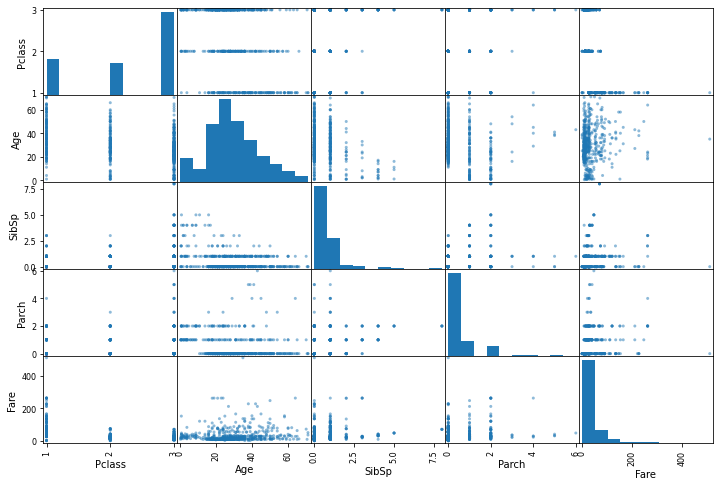

In [11]:
from pandas.plotting import scatter_matrix

attributes = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
scatter_matrix(X_train[attributes], figsize=(12, 8))

In [12]:
corr_matrix = titanic.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

- Fare, Pclassの相関が高い
- Parch, SibSp, Ageも一定の相関がある

In [13]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 前処理方針
- Pclass: 相関高い。1,2,3の順に高級だがそのまま処理して良いのか？
- Name: Drop
- Sex: OneHotEncode
- Age: そのまま
- SibSp: そのまま
- ParCh: そのまま
- Ticket Drop
- Fare: 相関高い。Pclassと同じ傾向が出て、特徴の影響が強くなりすぎるのを避けるために除外すべきかと考えたが、Pclass=1の中でもばらつきがある。
- Cabin: Drop。データを数値的に利用するには処理が必要。出口・非常口・救命ボートなどへの距離として数値化できれば面白そう。他の特徴量で性能が出なければ検討する。
- Embarked: OneHotEncode 良い特徴量になる気はしていないが、一旦やってみる

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

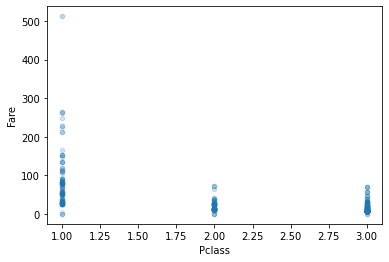

In [14]:
titanic.plot(kind="scatter", x="Pclass", y="Fare", alpha=0.1)

# Preprocess

Pipelineにするので不要

In [15]:
# titanic_num = titanic.drop(["Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
# titanic_num

In [16]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy="median")
# imputer.fit(titanic_num)
# imputer.statistics_, titanic_num.median().values

In [17]:
# from sklearn.preprocessing import OneHotEncoder

# sex = titanic[["Sex"]]

# sex_encoder = OneHotEncoder()
# sex_1hot = sex_encoder.fit_transform(sex)
# sex_encoder.categories_, sex_1hot.toarray()

In [18]:
# embarked = titanic[["Embarked"]]

# embarked_encoder = OneHotEncoder()
# embarked_1hot = embarked_encoder.fit_transform(embarked)
# embarked_encoder.categories_, embarked_1hot.toarray()

In [19]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# ignored_attributes = ["PassengerId", "Name", "Ticket", "Cabin"]
num_attributes = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
cat_attributes = ["Sex", "Embarked"]

pipeline = ColumnTransformer([
  ("num", SimpleImputer(), num_attributes),
  ("cat", OneHotEncoder(), cat_attributes),
])

In [21]:
X_train_prepared = pipeline.fit_transform(X_train)
pd.DataFrame(X_train_prepared)

,0,1,2,3,4,5,6,7,8,9,10
0,3.0,45.000000,0.0,0.0,6.9750,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,29.565394,0.0,0.0,30.6958,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,35.000000,0.0,0.0,26.2875,0.0,1.0,0.0,0.0,1.0,0.0
3,3.0,29.565394,0.0,0.0,7.8958,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,36.000000,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
707,2.0,54.000000,0.0,0.0,26.0000,0.0,1.0,0.0,0.0,1.0,0.0
708,1.0,29.565394,0.0,0.0,27.7208,0.0,1.0,1.0,0.0,0.0,0.0
709,2.0,27.000000,1.0,0.0,21.0000,1.0,0.0,0.0,0.0,1.0,0.0
710,3.0,28.000000,0.0,0.0,7.8958,0.0,1.0,0.0,0.0,1.0,0.0


# Train Model

モデルをどれにすべきか。探りながらではあるが SGD, RandomForest, KNeibhor あたりを試してみる。

In [25]:
len(X_train_prepared), len(y_train)

(712, 712)

In [61]:
y_train = y_train.__array__().flatten()

## SGD

In [62]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=38)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=38)

In [63]:
sgd_clf.predict(X_train_prepared[:10]), y_train[:10]

(array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0]))

In [68]:
cross_val_score(sgd_clf, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.79411765, 0.62447257, 0.75949367])

 Kaggleでの指標が正解率なので正解率を検証。62~79%なので高くはない。。

## RandomForest

In [69]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=38)
y_probas_forest = cross_val_predict(forest_clf, X_train_prepared, y_train, cv=3, method="predict_proba")
y_probas_forest

array([[0.84, 0.16],
       [0.71, 0.29],
       [0.14, 0.86],
       ...,
       [0.15, 0.85],
       [0.99, 0.01],
       [0.  , 1.  ]])

In [89]:
forest_clf = RandomForestClassifier(random_state=38)
forest_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(random_state=38)

In [90]:
forest_clf.predict(X_train_prepared[:10]), y_train[:10]

(array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0]), array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0]))

SGDよりもスコア良さそう

In [76]:
cross_val_score(forest_clf, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.80252101, 0.77637131, 0.82700422])

77~82%。向上してはいるがもうちょっと上げれないか。

## KNeighbors

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_prepared, y_train)

KNeighborsClassifier()

In [78]:
knn_clf.predict(X_train_prepared[:10]), y_train[:10]

(array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0]), array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0]))

In [79]:
cross_val_score(knn_clf, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.71008403, 0.66666667, 0.73839662])

66~73%。10サンプルで予想はできていたけどあまり高くない。K Neighborsの計算方法は現在の特徴量にはフィットしないか。座席位置を使う時などは良さそう。

## SVM

In [80]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train_prepared, y_train)

SVC()

In [81]:
svm_clf.predict(X_train_prepared[:10]), y_train[:10]

(array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0]))

In [82]:
cross_val_score(svm_clf, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.65966387, 0.63291139, 0.70464135])

63~70% あまり良くはない

## Adjust Model
RandomForestが性能良かったので、それを主軸に調整を進める。
調整して性能上がるのか、以下の内容を試してみる
- RandomForestのパラメータ調整をしてみる
- 特徴量をフィルタする
- 特徴量のスケーリング

### 特徴量取捨選択
相関の低いSibSp, 関連の薄そうなEmbarked, Fareと関連の強いPclassを除外して訓練

除外前は `80.2, 77.6, 82.7`

In [105]:
pipelines = [
  ColumnTransformer([ # remove SibSp
    ("num", SimpleImputer(), ["Pclass", "Age", "Parch", "Fare"]),
    ("cat", OneHotEncoder(), ["Sex", "Embarked"]),
  ]),
  ColumnTransformer([ # remove Embarked
    ("num", SimpleImputer(), ["Pclass", "Age", "SibSp", "Parch", "Fare"]),
    ("cat", OneHotEncoder(), ["Sex"]),
  ]),
  ColumnTransformer([ # remove Pclass
    ("num", SimpleImputer(), ["Age", "SibSp", "SibSp", "Parch", "Fare"]),
    ("cat", OneHotEncoder(), ["Sex", "Embarked"]),
  ]),
]

In [106]:
for pipeline in pipelines:
  _X_train = pipeline.fit_transform(X_train)

  clf = RandomForestClassifier(random_state=38)
  clf.fit(_X_train, y_train)
  score = cross_val_score(clf, _X_train, y_train, cv=3, scoring="accuracy")
  print(score)


[0.81512605 0.78481013 0.82700422]
[0.78991597 0.76371308 0.83122363]
[0.77310924 0.74683544 0.78902954]


SibSpの削除は性能向上が期待できる。

## スケーリング

値のレンジが広いAge, Fareをスケーリング

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler_pipeline = Pipeline([
  ('imputer', SimpleImputer()),
  ('std_scaler', StandardScaler()),
])

pipelines = [
  ColumnTransformer([ # scale Age
    ("num", SimpleImputer(), ["Pclass", "SibSp", "Parch", "Fare"]),
    ("scale", scaler_pipeline, ["Age"]),
    ("cat", OneHotEncoder(), ["Sex", "Embarked"]),
  ]),
  ColumnTransformer([ # scale Fare 
    ("num", SimpleImputer(), ["Pclass", "Age", "SibSp", "Parch"]),
    ("scale", scaler_pipeline, ["Fare"]),
    ("cat", OneHotEncoder(), ["Sex", "Embarked"]),
  ]),
  ColumnTransformer([ # scale Both
    ("num", SimpleImputer(), ["Pclass", "SibSp", "Parch"]),
    ("scale", scaler_pipeline, ["Age", "Fare"]),
    ("cat", OneHotEncoder(), ["Sex", "Embarked"]),
  ]),
]

In [112]:
for pipeline in pipelines:
  _X_train = pipeline.fit_transform(X_train)

  clf = RandomForestClassifier(random_state=38)
  clf.fit(_X_train, y_train)
  score = cross_val_score(clf, _X_train, y_train, cv=3, scoring="accuracy")
  print(score)


[0.81092437 0.78059072 0.82278481]
[0.80252101 0.77637131 0.82700422]
[0.81512605 0.77637131 0.81434599]


Ageは性能向上している。Fareは影響なし。両方スケールよりAgeのみスケールが性能良い。

In [114]:
# remove SibSp, scale Age
_pipeline = ColumnTransformer([ 
  ("num", SimpleImputer(), ["Pclass", "Parch", "Fare"]),
  ("scale", scaler_pipeline, ["Age"]),
  ("cat", OneHotEncoder(), ["Sex", "Embarked"]),
])

_X_train = _pipeline.fit_transform(X_train)
clf = RandomForestClassifier(random_state=38)
clf.fit(_X_train, y_train)
cross_val_score(clf, _X_train, y_train, cv=3, scoring="accuracy")

array([0.81092437, 0.7721519 , 0.83544304])

現時点で性能向上が期待できる前処理を実施。組み合わせることで大幅に性能上がるかと期待したが、それぞれの一定の向上にとどまる（1づつ向上したとしたら2は上がらず、1.1程度だった）。

## GridSearch
まずはパイプラインを変えずに検証

In [116]:
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

param_grid = [
  { 
    "criterion": ["gini", "entropy"],
    "class_weight": [None, 'balanced'],
    "max_features": ["sqrt", "log2"],
  }
]

_clf = RandomForestClassifier(random_state=38)
grid_search = GridSearchCV(_clf, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=38),
             param_grid=[{'class_weight': [None, 'balanced'],
                          'criterion': ['gini', 'entropy'],
                          'max_features': ['sqrt', 'log2']}],
             return_train_score=True, scoring='accuracy')

In [117]:
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       random_state=38)

In [121]:
grid_search.best_score_

0.8173347778981581

In [122]:
cross_val_score(grid_search.best_estimator_, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.80672269, 0.77637131, 0.81012658])

`80.2, 77.6, 82.7` からあまり変化ない

In [128]:
param_grid = [
  { 
    # "criterion": ["gini", "entropy"],
    "class_weight": ["balanced"],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2,4,8,16], # 1 is not a valid parameter
    "n_estimators": [10, 100, 200],
  }
]

_clf = RandomForestClassifier(random_state=38)
_grid_search = GridSearchCV(_clf, param_grid, cv=5, scoring="accuracy", return_train_score=True)
_grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=38),
             param_grid=[{'class_weight': ['balanced'],
                          'max_features': ['sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8, 16],
                          'n_estimators': [10, 100, 200]}],
             return_train_score=True, scoring='accuracy')

In [129]:
_grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       min_samples_split=4, n_estimators=200, random_state=38)

In [130]:
cross_val_score(_grid_search.best_estimator_, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.82352941, 0.77637131, 0.8185654 ])

少し上がったので、min_samples_splitは狭めて、n_estimatorsは上限増やして再調整

In [133]:
param_grid = [
  { 
    "criterion": ["gini", "entropy"],
    "class_weight": ["balanced"],
    "max_features": ["sqrt"],
    "min_samples_split": [3,4,5,6],
    "n_estimators": [150, 200, 250],
  }
]

_clf = RandomForestClassifier(random_state=38)
_grid_search = GridSearchCV(_clf, param_grid, cv=5, scoring="accuracy", return_train_score=True)
_grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=38),
             param_grid=[{'class_weight': ['balanced'],
                          'criterion': ['gini', 'entropy'],
                          'max_features': ['sqrt'],
                          'min_samples_split': [3, 4, 5, 6],
                          'n_estimators': [150, 200, 250]}],
             return_train_score=True, scoring='accuracy')

In [134]:
_grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       min_samples_split=4, n_estimators=150, random_state=38)

In [135]:
cross_val_score(_grid_search.best_estimator_, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.82352941, 0.7721519 , 0.83122363])

上がった。ここで特徴量の前処理の改善と合わせてみる。

In [142]:
_grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 150}

In [150]:
_pipeline = ColumnTransformer([ 
  ("num", SimpleImputer(), ["Pclass", "Parch", "Fare"]),
  ("scale", scaler_pipeline, ["Age"]),
  ("cat", OneHotEncoder(), ["Sex", "Embarked"]),
])

_X_train = _pipeline.fit_transform(X_train)
_clf = RandomForestClassifier(
  class_weight='balanced',
  max_features='sqrt',
  min_samples_split=4,
  n_estimators=150,
  random_state=38)
_clf.fit(_X_train, y_train)
cross_val_score(_clf, _X_train, y_train, cv=3, scoring="accuracy")

array([0.81092437, 0.7721519 , 0.84388186])

In [145]:
param_grid = [
  { 
    "criterion": ["gini", "entropy"],
    "class_weight": ["balanced"],
    "max_features": ["sqrt"],
    "min_samples_split": [3,4,5,6],
    "n_estimators": [150, 200, 250],
  }
]

_clf = RandomForestClassifier(random_state=38)
_grid_search = GridSearchCV(_clf, param_grid, cv=5, scoring="accuracy", return_train_score=True)
_grid_search.fit(_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=38),
             param_grid=[{'class_weight': ['balanced'],
                          'criterion': ['gini', 'entropy'],
                          'max_features': ['sqrt'],
                          'min_samples_split': [3, 4, 5, 6],
                          'n_estimators': [150, 200, 250]}],
             return_train_score=True, scoring='accuracy')

In [147]:
_grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=200, random_state=38)

前処理変えるとパイパーパラメータもちょっと変わる（過学習の匂いがしないでもないが

In [149]:
_pipeline = ColumnTransformer([ 
  ("num", SimpleImputer(), ["Pclass", "Parch", "Fare"]),
  ("scale", scaler_pipeline, ["Age"]),
  ("cat", OneHotEncoder(), ["Sex", "Embarked"]),
])

_X_train = _pipeline.fit_transform(X_train)
_clf = RandomForestClassifier(
  class_weight='balanced',
  criterion='entropy',
  max_features='sqrt',
  min_samples_split=5,
  n_estimators=200,
  random_state=38)
_clf.fit(_X_train, y_train)
cross_val_score(_clf, _X_train, y_train, cv=3, scoring="accuracy")

array([0.81932773, 0.77637131, 0.84388186])

`[0.81092437, 0.7721519 , 0.84388186]` が前処理改善前なので、多少は上がった。

# テストセットで確認

In [154]:
_y_test = test.iloc[:, 1:2]
X_test = test.drop(_y_test.columns, axis=1)
y_test = _y_test.__array__().flatten()

In [155]:
transformer = ColumnTransformer([ 
  ("num", SimpleImputer(), ["Pclass", "Parch", "Fare"]),
  ("scale", scaler_pipeline, ["Age"]),
  ("cat", OneHotEncoder(), ["Sex", "Embarked"]),
])

_X_test = transformer.fit_transform(X_test)
clf = RandomForestClassifier(
  class_weight='balanced',
  criterion='entropy',
  max_features='sqrt',
  min_samples_split=5,
  n_estimators=200,
  random_state=38)
clf.fit(_X_test, y_test)
cross_val_score(clf, _X_test, y_test, cv=3, scoring="accuracy")

array([0.81666667, 0.81666667, 0.81355932])

81%の正解率。まあ良い結果では。

# 提出

In [156]:
titanic_test = pd.read_csv('./titanic/test.csv')

In [158]:
_titanic_test = transformer.fit_transform(titanic_test)
predict = clf.predict(_titanic_test)
predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [167]:
id = np.array(titanic_test["PassengerId"]).astype(int)
df = pd.DataFrame(predict, id, columns = ["Survived"])
df

,Survived
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0
1308,0


In [168]:
df.to_csv("./titanic/predict.csv", index_label = ["PassengerId"])

結果0.75598だった